# EDA - Preprocessing for names + Study on nutritional facts for each type of Cuisine

## Loading preprocessed dataset

In [2]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
data = None
if not os.path.exists('../../data/preprocessed/preprocessed_recipe.csv'):
    print('Not found: ../../data/preprocessed/preprocessed_recipe.csv')
else:
    data = pd.read_csv('../../data/preprocessed/preprocessed_recipe.csv')

NameError: name 'BasePreprocessing' is not defined

In [4]:
data.head()

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,cuisine
id,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,North America – United States
31490,a bit different breakfast pizza,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,North America – United States
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,North America – United States
5289,apple a day milk shake,0,1533,1999-12-06,"[15-minutes-or-less, time-to-make, course, mai...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,North America – United States
25274,aww marinated olives,15,21730,2002-04-14,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9,North America – United States


In [ ]:
data.drop(columns=["contributor_id", "submitted"], inplace=True, errors="ignore")

In [6]:
data.head()

,name,minutes,tags,nutrition,n_steps,steps,ingredients,n_ingredients,cuisine
id,,,,,,,,,
137739,arriba baked winter squash mexican style,55,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,North America – United States
31490,a bit different breakfast pizza,30,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,North America – United States
44061,amish tomato ketchup for canning,190,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,North America – United States
5289,apple a day milk shake,0,"[15-minutes-or-less, time-to-make, course, mai...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4,North America – United States
25274,aww marinated olives,15,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9,North America – United States


In [7]:
# Drop rows where 'name' column has NaN values
data = data.dropna(subset=['name'])

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
additional = {
    "minutes", "easiest", "ever", "aww", "i", "can", "t", "believe", "it", "s", "stole", "the", "idea", "from","mirj", "andrea", " s ", "andreas",
    "viestad", "andes", "andersen", "an", "ana", "amy", "2 ww points", "on demand", "anelia", "amazing",
    "ashley", "ashton", "amazing", "make", "house", "smell", "malcolm", "amazingly", "killer", "perfect",
    "addictive", "leave", "u", "licking", "ur", "finger", "clean", "th", "recipe", "special", "time", "favorite",
    "aunt", "jane", "soft", "and", "moist", "licking", "famous", "non fruitcake", "true", "later",
    "nonbeliever", "believer", "comfort", "ultimate", "lover", "love", "easy", "ugly", "cc", "uncle", "bill", "tyler",
    "unbelievably", "unbelievable", "healthy", "fat", "free", "un", "melt", "mouth", "ummmmm", "umm", "ummmy", "nummy", "ummmm", "unattended",
    "unbaked", "ultra", "ultimately", "yummy", "rich", "quick", "rachael", "ray", "fail", "party", "florence",
    "fast", "light", "low", "carb", "snack", "wedding", "anniversary", "anne", "marie", "annemarie", "annette", "funicello", "syms",
    "byrn", "mike", "willan", "summer", "autumn", "winter", "spring", "burrel", "anna", "tres", "sweet", "uber",
    "homemade", "ann","best","j", "anite", "anitas", "anman", "angie", "angry", "simple", "difficult", "andy", "andrew", "ancient", "still", "another", "best", "go",
    "grant", "grandma", "amusement", "park", "instruction", "kitchen", "test", "ww", "almost", "empty", "dressing", "instant", "like", "le", "virtually",
    "home", "made", "guilt", "guilty", "delicious", "parfait", "forgotten", "forget", "forevermama", "diet", "can", "real", "former",
    "miss", "fabulous", "forever", "authentic", "fortnum", "mason", "kid", "foolproof", "football", "season", "diabetic",
    "two", "small", "one", "three", "four", "five", "thanksgiving", "dream", "foothill", "paula", "deen", "food", "processor", "safari", "processor",
    "traditional", "forbidden", "flavorful", "grandmag", "grandmama", "grandmaman", "grandma", "grandmom", "lena", "alicia", "alisa", "alice", "ali", "bit", "different",
    "eat", "family", "global", "gourmet", "yam", "yam", "emotional", "balance", "tonight", "feel", "cooking", "got", "birthday", "air", "way", "mr", "never", "weep", "half",
    "anything", "pour", "put", "fork", "say", "stove", "top", "thought", "prize", "winning", "add", "ad", "good", "better", "da", "style", "even", "bran", "fake", "fire", "beautiful"
    "l", "game", "day", "hate", "world", "minute", "type", "starbucks", "biggest", "dressed", "summertime", "elmer", "johnny", "depp", "c", "p", "h", "clove", "er", "star", "week",
    "affair", "elegant", "student", "z", "whole", "lotta", "w", "z", "b", "aaron", "craze", "a", "abc", "absolute", "absolut", "absolutely", "perfection", "delightful", "lazy", "morning",
    "abuelo", "abuelito", "abuelita", "abuela", "acadia", "accidental", "adam", "little", "interest", "addicting", "addie", "adele", "adelaide", "adi", "adie", "adriana",
    "adult", "affordable", "alison", "holst", "purpose", "allegheny", "allegedly", "original", "allergic", "ex", "allergy", "allergen", "allen", "poorman", "backyard",
    "alton", "brown", "whatever", "anthony", "anytime", "april", "fool", "ya", "fooled", "sandra", "lee", "edna", "emma", "emy", "evy", "eva", 'evelyn', "fannie", "fanny", "flo", "gladys", "helen", "grace", "ira", "irma",
    "isse", "jean", "janet", "jenny", "juju", "judy", "kathy", "kathi", "kellie", "kelly", "laura", "lee", "kay", "kathleen", "laura", "lee", "lesley", "lil", "linda", "liz", "lois", "louisse",
    "mag", 'martguerite', "margie", "marge", "maggie", "martha", "marylin", "marion", "mary", "marthy", "melody", "michel", "meda", "millie", "muriel", "myrna", "nelda", "nancy", "paulie", "phillis", "rae", "rebecca",
    "rose", "sadie", "sarah", "sara", "sue", "susan", "teresa", "theresa", "auntie", "em", "barbara", "barb", "irene", "lolo", "lori", "lu", "maebelle",
    "aunty", "aussie", "aurora", "austin", "l", "q"
    
    }
stop_words.update(additional) 

"""
??? umyum ring emphasis yum
??? lover => does not want to go away :()
"""
# Function to clean recipe names
def clean_recipe_names(recipes):
    cleaned_recipes = []
    
    for recipe in recipes:
        recipe = recipe.lower()
        recipe = re.sub(r'[^a-z\s]', '', recipe)
        
        recipe_words = recipe.split()
        
        # Lemmatize first
        recipe_words = [lemmatizer.lemmatize(word) for word in recipe_words]
        
        # Then remove stopwords
        recipe_words = [word for word in recipe_words if word not in stop_words]
        
        cleaned_recipe = " ".join(recipe_words)
        cleaned_recipes.append(cleaned_recipe)
    
    return cleaned_recipes

# Apply the cleaning function to the 'recipe_name' column
data['cleaned_name'] = clean_recipe_names(data['name'])

# Print out the first few rows of the DataFrame to check the results
print(data[['name', 'cleaned_name']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxboc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/maxboc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              name  \
id                                                   
137739  arriba   baked winter squash mexican style   
31490             a bit different  breakfast pizza   
44061           amish  tomato ketchup  for canning   
5289                       apple a day  milk shake   
25274                        aww  marinated olives   

                        cleaned_name  
id                                    
137739   arriba baked squash mexican  
31490                breakfast pizza  
44061   amish tomato ketchup canning  
5289                apple milk shake  
25274                marinated olive  


In [9]:
# data['cleaned_name'].to_csv('cleaned_recipes.csv', index=False)
data = data.dropna(subset=['cleaned_name'])
data.drop(columns=["name"], inplace=True, errors="ignore")
data.reset_index(inplace=True)
data.head()

,id,minutes,tags,nutrition,n_steps,steps,ingredients,n_ingredients,cuisine,cleaned_name
0,137739,55,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,North America – United States,arriba baked squash mexican
1,31490,30,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,North America – United States,breakfast pizza
2,44061,190,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,North America – United States,amish tomato ketchup canning
3,5289,0,"[15-minutes-or-less, time-to-make, course, mai...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4,North America – United States,apple milk shake
4,25274,15,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9,North America – United States,marinated olive


Here we create new columns according to the nutrition 

In [10]:
import ast  # Used for safely evaluating the string representation of a list

# Function to convert the nutrition string into separate columns
def expand_nutrition_column(data):
    # Convert the 'nutrition' column from string to list
    data['nutrition'] = data['nutrition'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Check if the nutrition column contains a list
    if data['nutrition'].apply(lambda x: isinstance(x, list)).all():
        # Create new columns for each nutritional value
        data[['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']] = pd.DataFrame(data['nutrition'].to_list(), index=data.index)
        
        # Optionally drop the original 'nutrition' column
        data.drop(columns=['nutrition'], inplace=True)
        
    return data

# Apply the function to expand the nutrition column into separate columns
data = expand_nutrition_column(data)

# Print the first few rows of the DataFrame to check the new columns
print(data.head())


       id  minutes                                               tags  \
0  137739       55  [60-minutes-or-less, time-to-make, course, mai...   
1   31490       30  [30-minutes-or-less, time-to-make, course, mai...   
2   44061      190  [weeknight, time-to-make, course, main-ingredi...   
3    5289        0  [15-minutes-or-less, time-to-make, course, mai...   
4   25274       15  [15-minutes-or-less, time-to-make, course, mai...   

   n_steps                                              steps  \
0       11  ['make a choice and proceed with recipe', 'dep...   
1        9  ['preheat oven to 425 degrees f', 'press dough...   
2        5  ['mix all ingredients& boil for 2 1 / 2 hours ...   
3        4  ['combine ingredients in blender', 'cover and ...   
4        4  ['toast the fennel seeds and lightly crush the...   

                                         ingredients  n_ingredients  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7   
1  ['prepared pizza crust', 

In [11]:
data.head()

,id,minutes,tags,n_steps,steps,ingredients,n_ingredients,cuisine,cleaned_name,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,137739,55,"[60-minutes-or-less, time-to-make, course, mai...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,North America – United States,arriba baked squash mexican,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,30,"[30-minutes-or-less, time-to-make, course, mai...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,North America – United States,breakfast pizza,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,44061,190,"[weeknight, time-to-make, course, main-ingredi...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,North America – United States,amish tomato ketchup canning,352.9,1.0,337.0,23.0,3.0,0.0,28.0
3,5289,0,"[15-minutes-or-less, time-to-make, course, mai...",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4,North America – United States,apple milk shake,160.2,10.0,55.0,3.0,9.0,20.0,7.0
4,25274,15,"[15-minutes-or-less, time-to-make, course, mai...",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9,North America – United States,marinated olive,380.7,53.0,7.0,24.0,6.0,24.0,6.0


## EDA on nutritional values

In [12]:
numerical_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
grouped_numerical = data.groupby('cuisine')[numerical_columns].mean()

# Calculate other statistical summaries like standard deviation
std_numerical = data.groupby('cuisine')[numerical_columns].std()

In [13]:
mask = data["saturated_fat"] > data["total_fat"]

# Swap the values for those rows
data.loc[mask, ["total_fat", "saturated_fat"]] = data.loc[mask, ["saturated_fat", "total_fat"]].values

In [14]:
data['saturated_fat_to_calories'] = data['saturated_fat'] / data['calories']

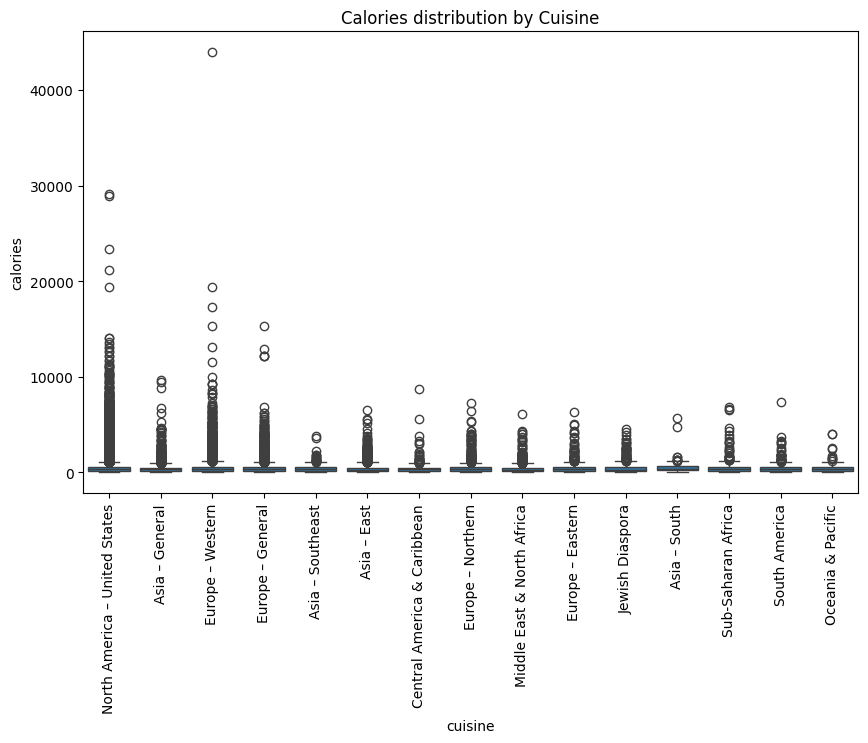

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='cuisine', y='calories')
plt.xticks(rotation=90)
plt.title("Calories distribution by Cuisine")
plt.show()

In [16]:
data[data["calories"] > 2000]

,id,minutes,tags,n_steps,steps,ingredients,n_ingredients,cuisine,cleaned_name,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,saturated_fat_to_calories
39,40237,40,"[60-minutes-or-less, time-to-make, course, mai...",7,['sift together and make 3 holes in dry ingred...,"['flour', 'sugar', 'cocoa', 'baking soda', 'sa...",9,North America – United States,wacky cake,2252.6,130.0,802.0,101.0,44.0,54.0,117.0,0.023972
50,124286,35,"[60-minutes-or-less, time-to-make, course, mai...",5,"['mix all cake ingredients till well blended',...","['flour', 'sugar', 'baking soda', 'cocoa powde...",11,North America – United States,chocolate cake,3987.2,369.0,1306.0,260.0,106.0,245.0,205.0,0.061447
75,83542,25,"[30-minutes-or-less, time-to-make, course, cui...",13,"['preheat oven to 375c', 'beat eggs , add suga...","['eggs', 'brown sugar', 'oil', 'milk', 'molass...",13,North America – United States,muffin,2488.6,199.0,775.0,133.0,87.0,116.0,109.0,0.046613
100,86768,15,"[15-minutes-or-less, time-to-make, course, mai...",14,"['place a large bowl , filled halfway with ice...","['semisweet chocolate', 'heavy cream', 'butter...",4,North America – United States,chocolate frosting,4076.9,1001.0,1181.0,71.0,53.0,491.0,118.0,0.120435
117,168590,12,"[15-minutes-or-less, time-to-make, course, cui...",13,"['let cream cheese come to room temperature', ...","['canned chicken', 'green chilies', 'cream che...",6,North America – United States,amigo crisp chicken burrito,2453.4,383.0,17.0,41.0,62.0,211.0,9.0,0.086003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86230,505267,80,"[time-to-make, course, main-ingredient, cuisin...",14,"['preheat oven to 350 degrees', 'in large glas...","['eggs', 'vegetable oil', 'white sugar', 'real...",14,North America – United States,zucchini spice bundt cake,5808.2,481.0,1647.0,219.0,151.0,204.0,232.0,0.035123
86245,92900,90,"[time-to-make, course, main-ingredient, cuisin...",8,"['preheat oven to 325', 'butter and flour 2 8""...","['flour', 'cinnamon', 'salt', 'baking soda', '...",13,North America – United States,zucchini walnut spiced bread,3409.3,324.0,1021.0,83.0,65.0,136.0,120.0,0.039891
86282,192793,10,"[15-minutes-or-less, time-to-make, course, mai...",8,['in a medium sized bowl toss the mixed greens...,"['mixed greens', 'strawberries', 'dried cranbe...",10,North America – United States,zupas chicken salad,2954.6,350.0,806.0,54.0,31.0,91.0,74.0,0.030799
86287,529308,60,"[60-minutes-or-less, time-to-make, cuisine, pr...",22,"['1', 'peel the onions and cut them in thin ri...","['beef broth', 'butter', 'onions', 'flour', 'o...",10,Europe – Western,zuppa di cipolla al vino rosso,9282.1,142.0,340.0,715.0,746.0,136.0,583.0,0.014652


Here we deemed that Calories per Cuisine is not a good idea.

Why so ? 🤔

Because some of the recipe are based on plates you can make for more people than others.

e.g. We compare the number of calories for a cake made for 8 people and a soup for one person => Makes no sense

In [17]:
data['total_fat_to_calories'] = data['total_fat'] / data['calories']
data['sugar_to_calories'] = data['sugar'] / data['calories']
data['sodium_to_calories'] = data['sodium'] / data['calories']
data['protein_to_calories'] = data['protein'] / data['calories']
data['carbohydrates_to_calories'] = data['carbohydrates'] / data['calories']
data['calories_to_saturated_fat'] = data['calories'] / data['saturated_fat']

/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1265670591.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1265670591.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1265670591.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1265670591.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='

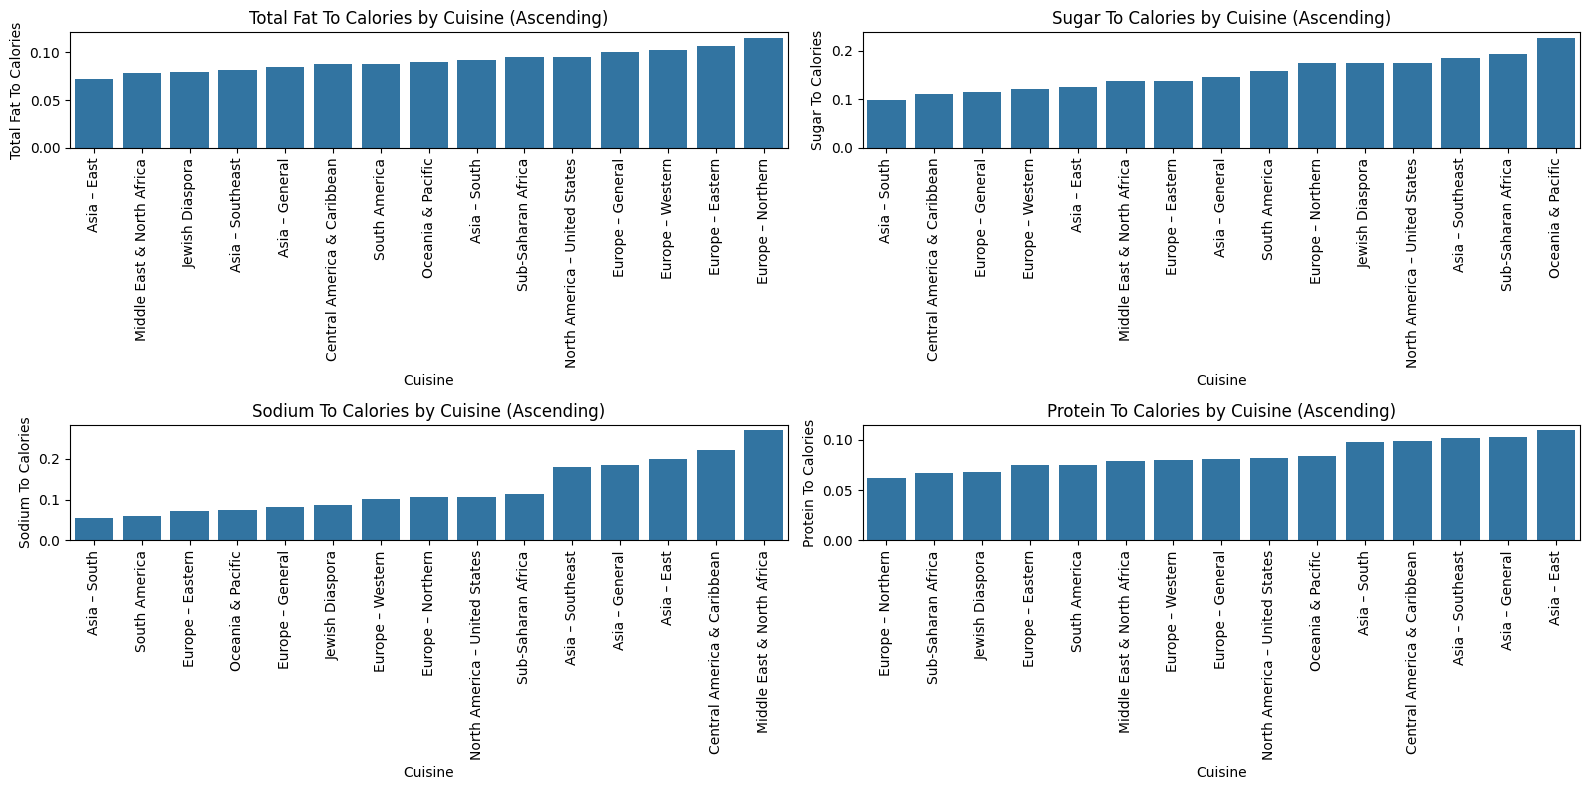

In [18]:
first_part_ratios = [
    'total_fat_to_calories',
    'sugar_to_calories',
    'sodium_to_calories',
    'protein_to_calories'
]

plt.figure(figsize=(16, 8))
for i, ratio in enumerate(first_part_ratios, 1):
    plt.subplot(2, 2, i)
    valid_data = data[np.isfinite(data[ratio])]
    order = valid_data.groupby('cuisine')[ratio].mean().sort_values().index
    sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
    plt.xticks(rotation=90)
    plt.xlabel('Cuisine')
    plt.ylabel(f'{ratio.replace("_", " ").title()}')
    plt.title(f'{ratio.replace("_", " ").title()} by Cuisine (Ascending)')
plt.tight_layout()
plt.show()


Here, the most important metric might be the ratio sodium to calories.

We can see that Middle East/North Africa countries but also Caraibbean/Central America and Asia are the one using saltier ingredients

/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1135882894.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1135882894.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
/var/folders/pg/1l4d75p90r565jztmcw4v8c00000gn/T/ipykernel_61965/1135882894.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)


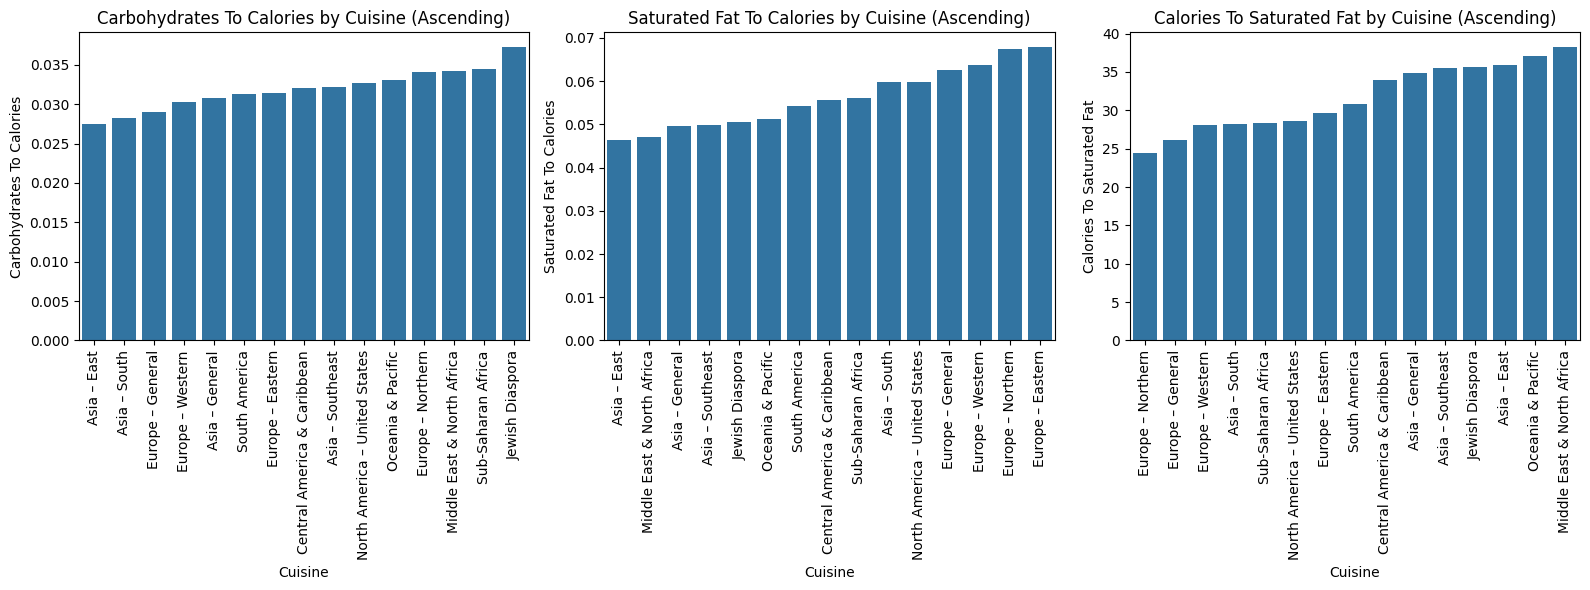

In [19]:
second_part_ratios = [
    'carbohydrates_to_calories',
    'saturated_fat_to_calories',
    'calories_to_saturated_fat'
]

plt.figure(figsize=(16, 6))
for i, ratio in enumerate(second_part_ratios, 1):
    plt.subplot(1, 3, i)
    valid_data = data[np.isfinite(data[ratio])]
    order = valid_data.groupby('cuisine')[ratio].mean().sort_values().index
    sns.barplot(x='cuisine', y=ratio, data=valid_data, order=order, estimator='mean', ci=None)
    plt.xticks(rotation=90)
    plt.xlabel('Cuisine')
    plt.ylabel(f'{ratio.replace("_", " ").title()}')
    plt.title(f'{ratio.replace("_", " ").title()} by Cuisine (Ascending)')
plt.tight_layout()
plt.show()